## Desafio Sprint 3

Neste arquivo notebook contém as 8 etapas propostas no desafio da sprint 3.

### Configurações prévias do código: importações de bibliotecas e definições de funções auxiliares

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('googleplaystore.csv')

def get_coluna(coluna):
    return df[coluna].replace({',': '', '\+': ''}, regex=True)

# Converter para exibir numeros inteiros e não notação cientifica
pd.set_option('display.float_format', '{:,.0f}'.format)

## 1: Remover linhas duplicadas

In [2]:

print(f"Quantidade de linhas originais: {df.shape[0]}")

df = df.drop_duplicates()

print(f"Quantidade de linhas sem duplicações: {df.shape[0]}")

Quantidade de linhas originais: 10841
Quantidade de linhas sem duplicações: 10358


## 2: Criar gráfico de barras contendo o top 5 apps mais instalados

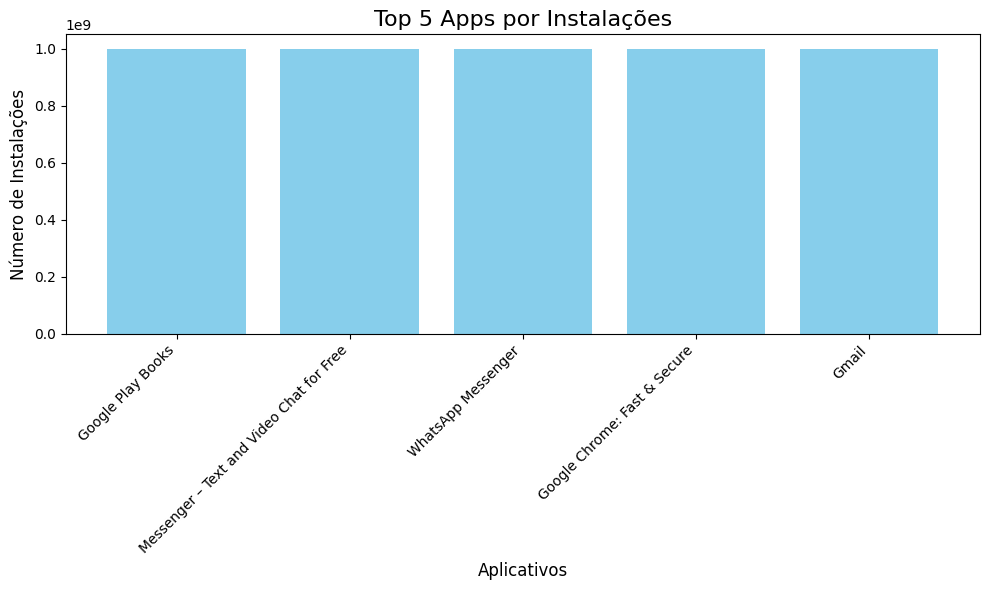

In [3]:
installs = get_coluna('Installs')

installs = pd.to_numeric(installs, errors='coerce')

five_installs = installs.nlargest(5)

five_apps = df.loc[five_installs.index, 'App']

plt.figure(figsize=(10, 6))
plt.bar(five_apps, five_installs, color='skyblue')

plt.title('Top 5 Apps por Instalações', fontsize=16)
plt.xlabel('Aplicativos', fontsize=12)
plt.ylabel('Número de Instalações', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 3: Gráfico Pie Chart para demonstrar as categorias de apps de acordo com sua frequência

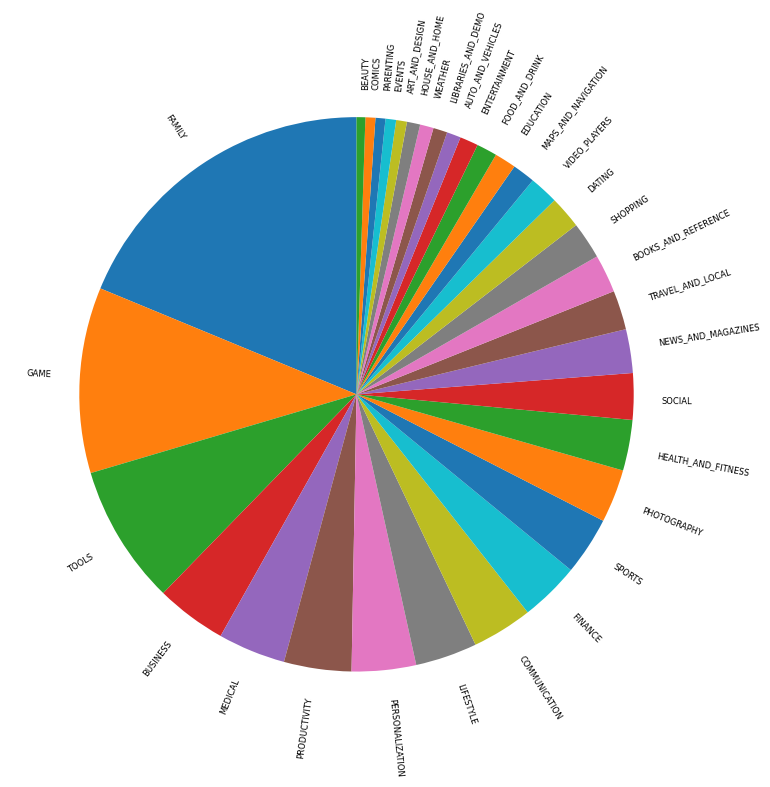

In [4]:
from collections import Counter

frequencias = Counter(get_coluna('Category'))
frequencias = pd.Series(frequencias)
frequencias = frequencias[frequencias.index != '1.9']
frequencias = frequencias.sort_values(ascending=False)

plt.figure(figsize=(9, 9))

outputs = plt.pie(frequencias, labels=frequencias.index, startangle=90,
                  textprops={'fontsize': 6}, labeldistance=1.1, rotatelabels=True)

if len(outputs) == 3:
    wedges, texts, autotexts = outputs
else:
    wedges, texts = outputs

plt.show()

### 4: Mostrar qual app mais caro no dataset

In [5]:
coluna_price = df['Price'] = df['Price'].replace({'\$': '', ',': ''}, regex=True)
coluna_price = pd.to_numeric(df['Price'], errors='coerce')
coluna_app = get_coluna('App')

indice_max = coluna_price.idxmax()

app_mais_caro = df.loc[indice_max, 'App']
valor_maximo = coluna_price[indice_max]

print(f"App mais caro: {app_mais_caro} - {valor_maximo}")

App mais caro: I'm Rich - Trump Edition - 400.0


### 5: Mostrar quantos apps são classificados como "Mature 17+"

In [6]:
mature = get_coluna('Content Rating')

mature_apps = df[df['Content Rating'] == 'Mature 17+']['App']

quantidade = len(mature_apps)

print(f"São {quantidade} apps que são classificados como 'Mature 17+'")

São 447 apps que são classificados como 'Mature 17+'


### 6: Mostrar o top 10 apps de acordo com o número de reviews e o respectivo número de reviews

In [7]:
reviews = pd.to_numeric(df['Reviews'], errors='coerce')

apps = df.loc[df['App'].duplicated(keep='first') == False, ['App', 'Reviews']]

apps['Reviews'] = reviews

apps = apps.sort_values(by='Reviews', ascending=False).head(10)

print(apps)

                                                    App    Reviews
2544                                           Facebook 78,158,306
336                                  WhatsApp Messenger 69,119,316
2545                                          Instagram 66,577,313
335            Messenger – Text and Video Chat for Free 56,642,847
1670                                     Clash of Clans 44,891,723
4005            Clean Master- Space Cleaner & Antivirus 42,916,526
1654                                     Subway Surfers 27,722,264
3665                                            YouTube 25,655,305
7536  Security Master - Antivirus, VPN, AppLock, Boo... 24,900,999
1660                                       Clash Royale 23,133,508


### 7: Criar dois calculos usando o dataset

In [8]:
# top 10 generos de app menos utilizados
top_five_genres = df['Genres'].value_counts().tail(10)

print("Top 10 generos de apps menos usados:")
print(top_five_genres)

# App com o maior nome
apps = df['App']

app_com_maior_nome = apps.loc[apps.str.len().idxmax()]

print(f"O App com o maior nome é: {app_com_maior_nome}")

Top 10 generos de apps menos usados:
Genres
Travel & Local;Action & Adventure    1
Casual;Music & Video                 1
Board;Pretend Play                   1
Health & Fitness;Education           1
Music & Audio;Music & Video          1
Arcade;Pretend Play                  1
Card;Brain Games                     1
Lifestyle;Pretend Play               1
Comics;Creativity                    1
Strategy;Creativity                  1
Name: count, dtype: int64
O App com o maior nome é: 591 housing transactions - renting houses, middle-class houses, new cases, real-time registration, villas through the sky, apartment suites, MRT, buying a house selling prices, housing mortgages


### 8: Criar dois gráficos utilizando o dataset

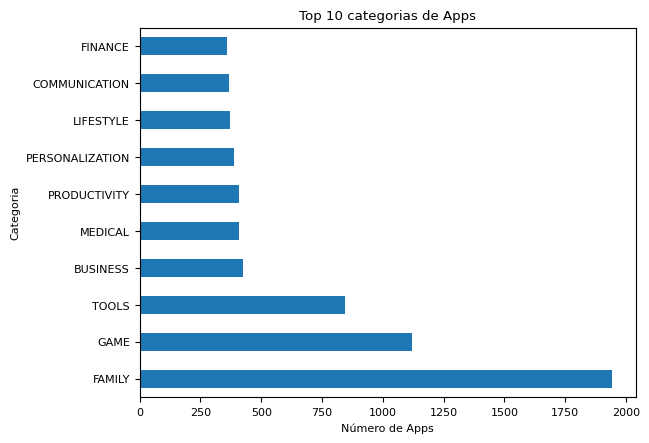

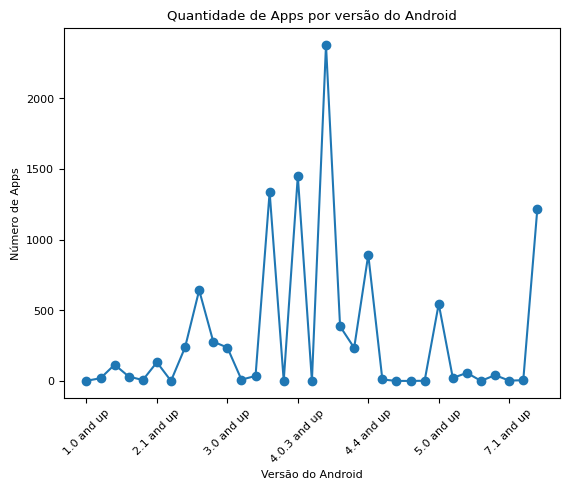

In [9]:
plt.rc('font', size=8)

# Gráfico em barras laterais para mostrar os 10 generos de apps mais usados
coluna_genero = df['Category'].value_counts().head(10)
coluna_genero.plot.barh()
plt.xlabel('Número de Apps')
plt.ylabel('Categoria')
plt.title('Top 10 categorias de Apps')
plt.show()

# Quantidade de apps lançados para cada versão de android
coluna_androidver = df['Android Ver'].value_counts().sort_index()
coluna_androidver.plot.line(marker='o')
plt.xlabel('Versão do Android')
plt.ylabel('Número de Apps')
plt.title('Quantidade de Apps por versão do Android')
plt.xticks(rotation=45)
plt.show()